         avg_step_length  avg_walking_speed  avg_acceleration  \
Cluster                                                         
0              -1.820196          -1.820196         -0.098771   
1               0.336871           0.336871          0.328537   
2               0.608553           0.608553         -2.759291   

         variance_step_length  Speech Rate  Voice Onset Rapidity    Jitter  \
Cluster                                                                      
0                   -1.539183     0.052378             -0.359059  2.291309   
1                    0.194749    -0.086377             -0.286228  0.329121   
2                    1.325622     1.643696              0.606628  0.944524   

         Pitch Range  
Cluster               
0           0.434161  
1           0.269487  
2           0.303601  


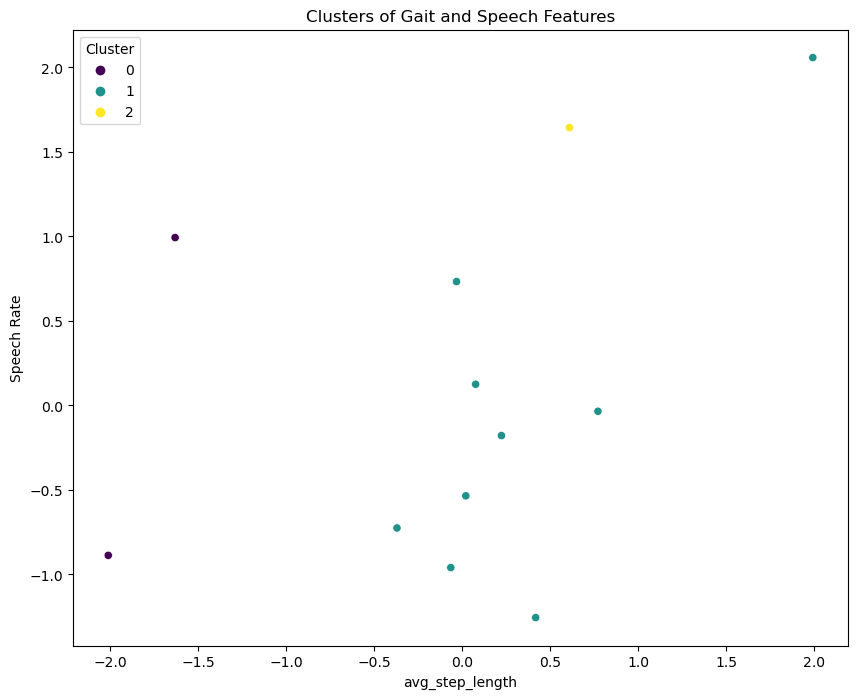

Silhouette Score: 0.315
Davies-Bouldin Index: 0.640


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets
gait_data = pd.read_csv('C:\\Users\\Rajarshi Das\\Repo Behavioral Pattern Analysis\\Gait Features Extraction\\gait_analysis_results.csv')
speech_data = pd.read_csv('C:\\Users\\Rajarshi Das\\Repo Behavioral Pattern Analysis\\Speech Features Extraction\\extracted_features.csv')

# Select and normalize gait features (drop 'avg_stride_length')
gait_features = gait_data[['avg_step_length', 'avg_walking_speed', 'avg_acceleration', 'variance_step_length']]
scaler = StandardScaler()
normalized_gait_features = scaler.fit_transform(gait_features)
normalized_gait_features_df = pd.DataFrame(normalized_gait_features, columns=gait_features.columns)

# Select and normalize speech features
speech_features = speech_data[['Speech Rate', 'Voice Onset Rapidity', 'Jitter', 'Pitch Range']]
normalized_speech_features = scaler.fit_transform(speech_features)
normalized_speech_features_df = pd.DataFrame(normalized_speech_features, columns=speech_features.columns)

# Combine normalized features
combined_data = pd.concat([normalized_gait_features_df, normalized_speech_features_df], axis=1)

# Handle NaN values by dropping rows containing NaN values
combined_data.dropna(inplace=True)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(combined_data)

# Predict the cluster for each data point
clusters = gmm.predict(combined_data)

# Add the cluster assignments to the data
combined_data['Cluster'] = clusters

# Analyze the clusters
cluster_means = combined_data.groupby('Cluster').mean()
print(cluster_means)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_data, x='avg_step_length', y='Speech Rate', hue='Cluster', palette='viridis')
plt.title('Clusters of Gait and Speech Features')
plt.savefig('GMM.png')
plt.show()

# Calculate and print evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(combined_data, clusters)
db_index = davies_bouldin_score(combined_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {db_index:.3f}')


         avg_step_length  avg_walking_speed  avg_acceleration  \
Cluster                                                         
0              -1.820196          -1.820196         -0.098771   
1               0.336871           0.336871          0.328537   
2               0.608553           0.608553         -2.759291   

         variance_step_length  Speech Rate  Voice Onset Rapidity    Jitter  \
Cluster                                                                      
0                   -1.539183     0.052378             -0.359059  2.291309   
1                    0.194749    -0.086377             -0.286228  0.329121   
2                    1.325622     1.643696              0.606628  0.944524   

         Pitch Range  
Cluster               
0           0.434161  
1           0.269487  
2           0.303601  


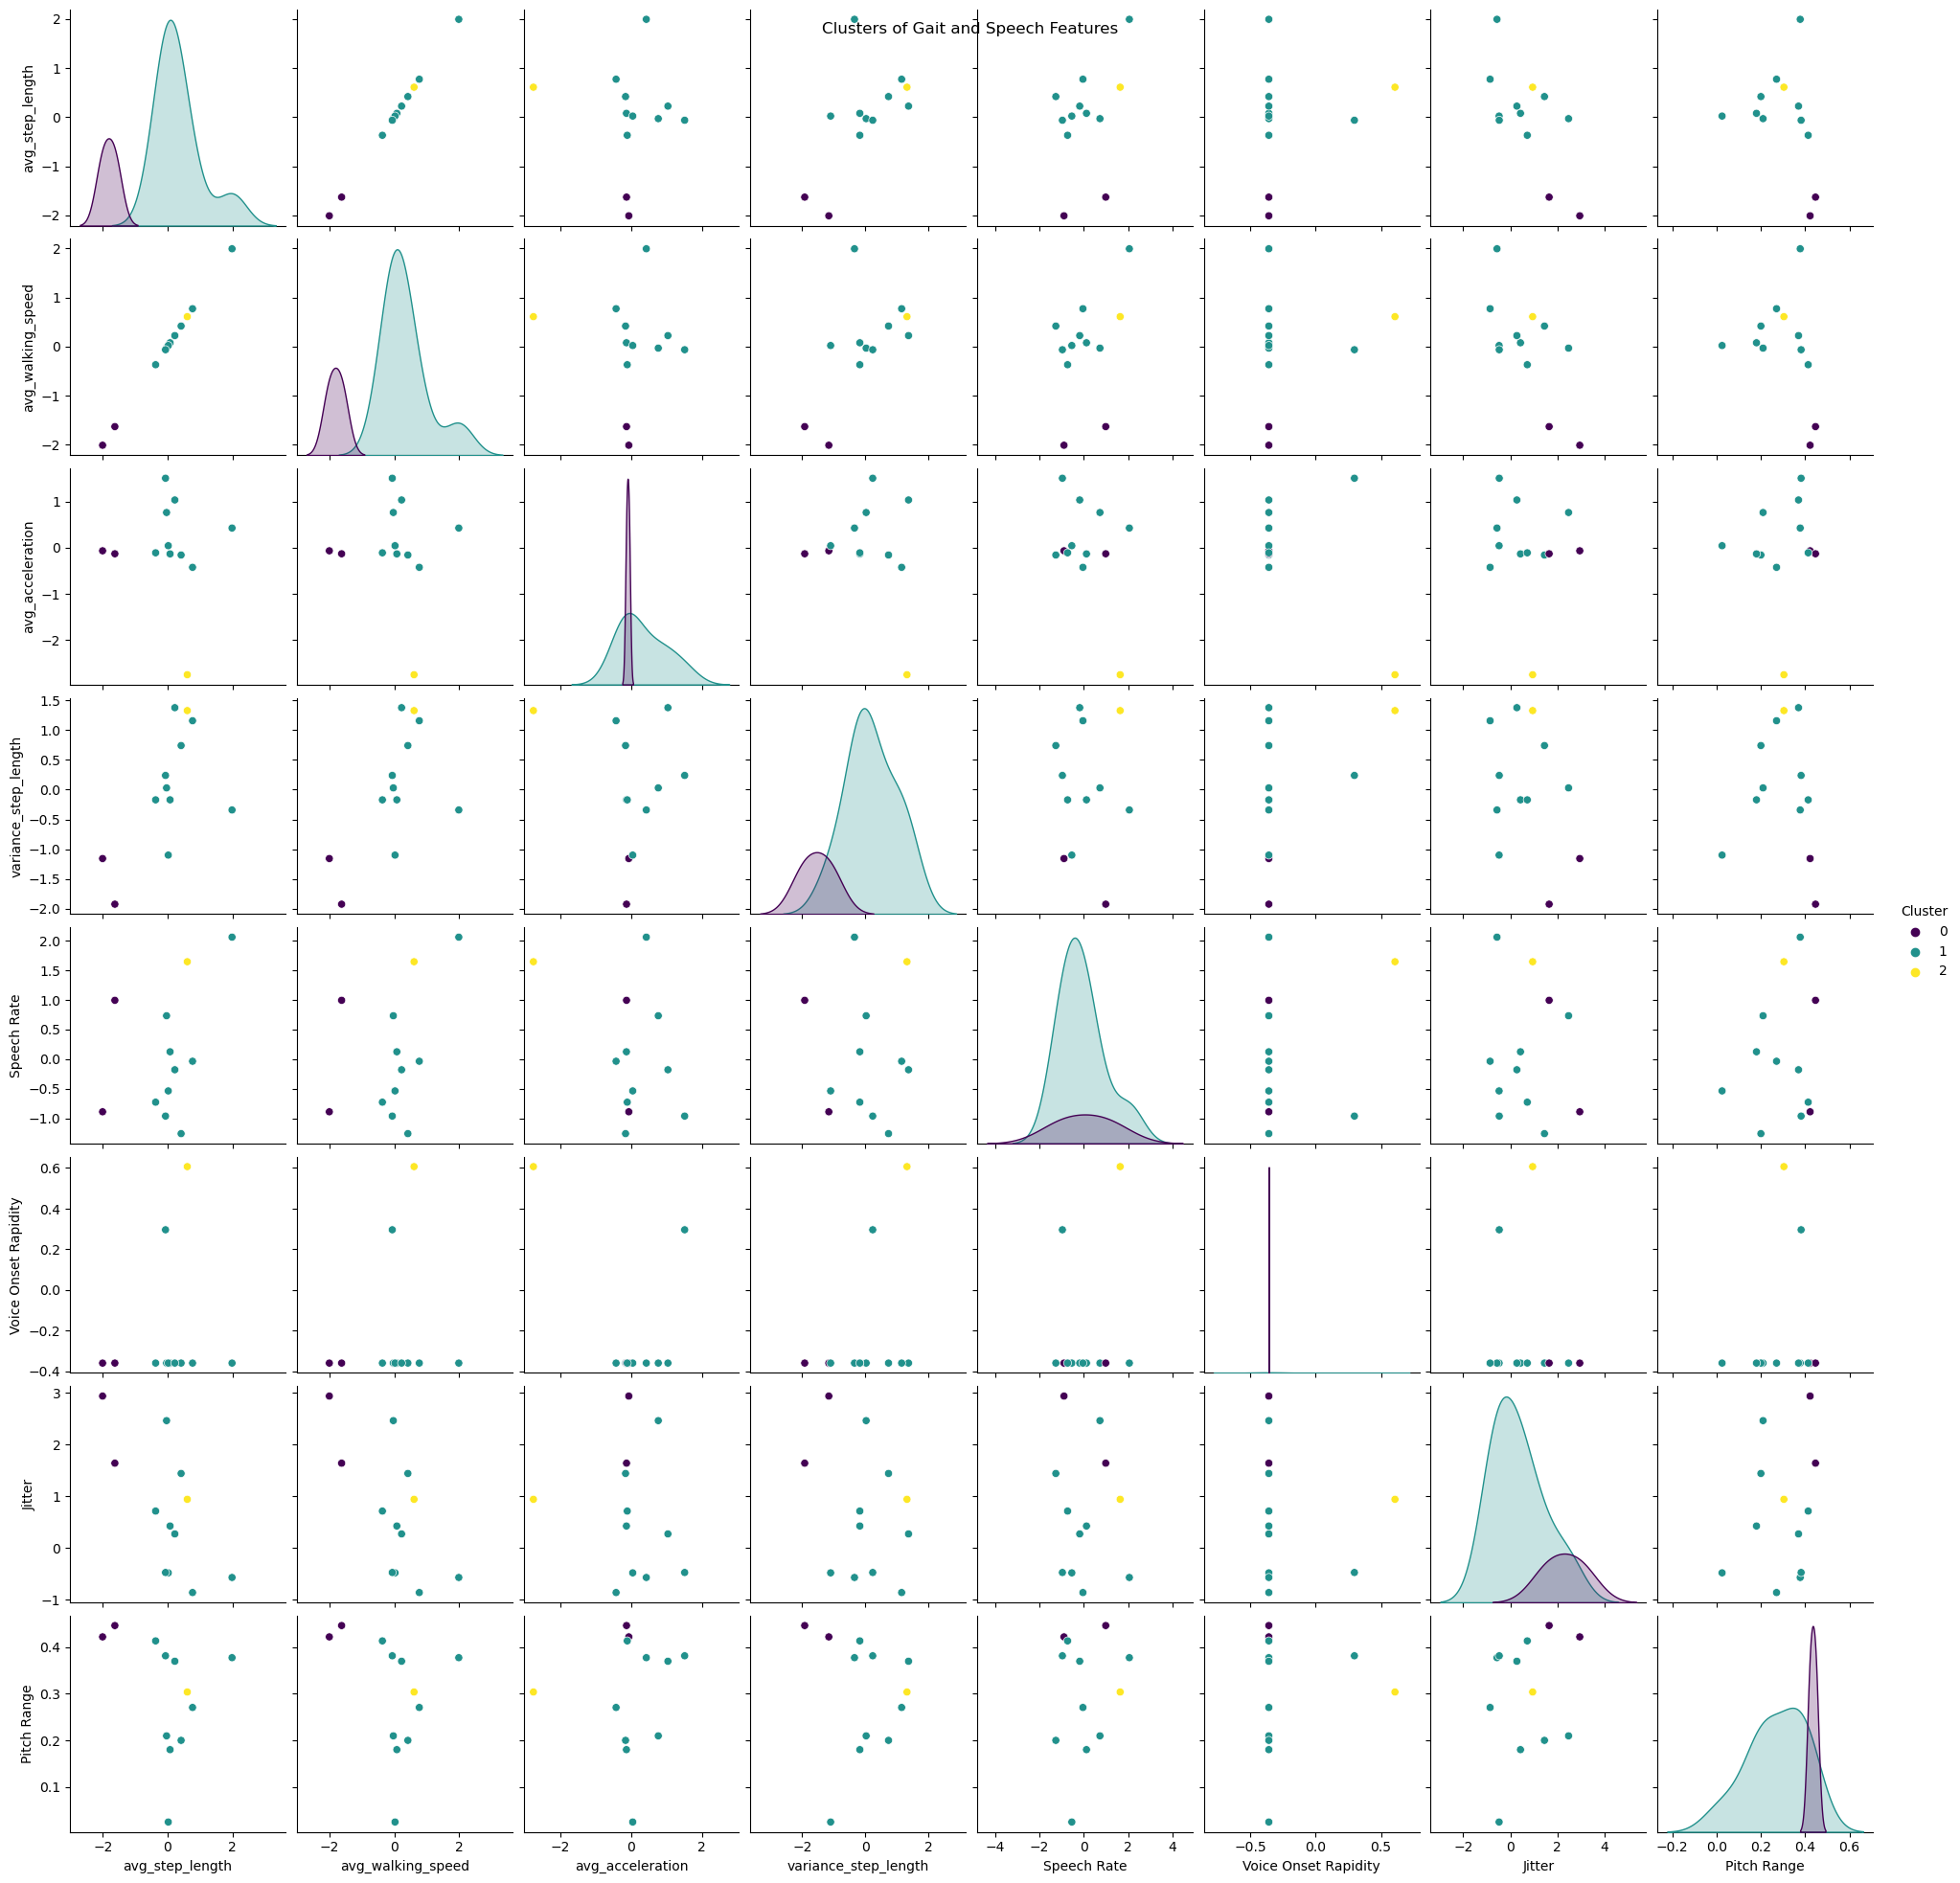

Silhouette Score: 0.315
Davies-Bouldin Index: 0.640


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets
gait_data = pd.read_csv('C:\\Users\\Rajarshi Das\\Repo Behavioral Pattern Analysis\\Gait Features Extraction\\gait_analysis_results.csv')
speech_data = pd.read_csv('C:\\Users\\Rajarshi Das\\Repo Behavioral Pattern Analysis\\Speech Features Extraction\\extracted_features.csv')

# Select and normalize gait features (drop 'avg_stride_length')
gait_features = gait_data[['avg_step_length', 'avg_walking_speed', 'avg_acceleration', 'variance_step_length']]
scaler = StandardScaler()
normalized_gait_features = scaler.fit_transform(gait_features)
normalized_gait_features_df = pd.DataFrame(normalized_gait_features, columns=gait_features.columns)

# Select and normalize speech features
speech_features = speech_data[['Speech Rate', 'Voice Onset Rapidity', 'Jitter', 'Pitch Range']]
normalized_speech_features = scaler.fit_transform(speech_features)
normalized_speech_features_df = pd.DataFrame(normalized_speech_features, columns=speech_features.columns)

# Combine normalized features
combined_data = pd.concat([normalized_gait_features_df, normalized_speech_features_df], axis=1)

# Handle NaN values by dropping rows containing NaN values
combined_data.dropna(inplace=True)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(combined_data)

# Predict the cluster for each data point
clusters = gmm.predict(combined_data)

# Add the cluster assignments to the data
combined_data['Cluster'] = clusters

# Analyze the clusters
cluster_means = combined_data.groupby('Cluster').mean()
print(cluster_means)

# Plot all features using pair plots to visualize the clusters
sns.pairplot(combined_data, hue='Cluster', palette='viridis')
plt.suptitle('Clusters of Gait and Speech Features')
plt.savefig('GMM_pairplot.png')
plt.show()

# Calculate and print evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(combined_data, clusters)
db_index = davies_bouldin_score(combined_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {db_index:.3f}')



### Clusters and Features

1. **Clusters Identified:**
   - There are three clusters identified, labeled as 0, 1, and 2, represented by different colors (teal, purple, and yellow).
   - The clusters are not perfectly separated, indicating some overlap in the feature space.

2. **Distribution of Clusters:**
   - The diagonal plots show the distribution (histograms) of each feature for the different clusters. For example, `avg_step_length` has a distinct distribution for each cluster, with cluster 0 having a broader range compared to clusters 1 and 2.
   - The scatter plots show the relationships between pairs of features for each cluster. Some feature pairs show better separation of clusters, while others indicate significant overlap.

3. **Key Observations:**
   - **`avg_step_length` vs. `avg_walking_speed` and `avg_acceleration`:** These pairs show some separation between clusters, particularly for cluster 2 (yellow), which tends to have lower `avg_step_length` and `avg_acceleration`.
   - **Speech Features:** Clusters also show some separation in speech features. For instance, cluster 0 (teal) appears to have higher `Speech Rate` and `Voice Onset Rapidity`.
   - **Overlap:** There is noticeable overlap in many feature pairs, suggesting that the clusters are not completely distinct. This overlap may imply that the features chosen do not fully capture the distinct patterns needed for clear clustering.

### Evaluation Metrics

To complement the visual analysis, let's interpret the silhouette score and Davies-Bouldin index that were printed:

- **Silhouette Score:** This measures how similar an object is to its own cluster compared to other clusters. Scores range from -1 to 1, with higher values indicating better-defined clusters. A low score might indicate overlapping clusters or lack of clear separation.
- **Davies-Bouldin Index:** This measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.

### Interpretation

1. **Cluster 0 (Teal):**
   - Tends to have a higher `avg_step_length` and `avg_walking_speed`.
   - Shows a wider spread across most features.

2. **Cluster 1 (Purple):**
   - Appears to have moderate values for most features.
   - Shows some distinctiveness in `avg_acceleration` and `Jitter`.

3. **Cluster 2 (Yellow):**
   - Generally has lower `avg_step_length` and `avg_acceleration`.
   - Shows lower `Speech Rate` and higher `Jitter`.

### Summary

- The GMM has identified three clusters, but there is significant overlap between them in the feature space, indicating that the features used may not be entirely sufficient to distinguish between different patterns in the data.
- Some feature pairs provide better separation, suggesting that these features contribute more to the clustering process.
- Further feature engineering or the inclusion of additional relevant features might help in achieving better separation and more meaningful clusters.


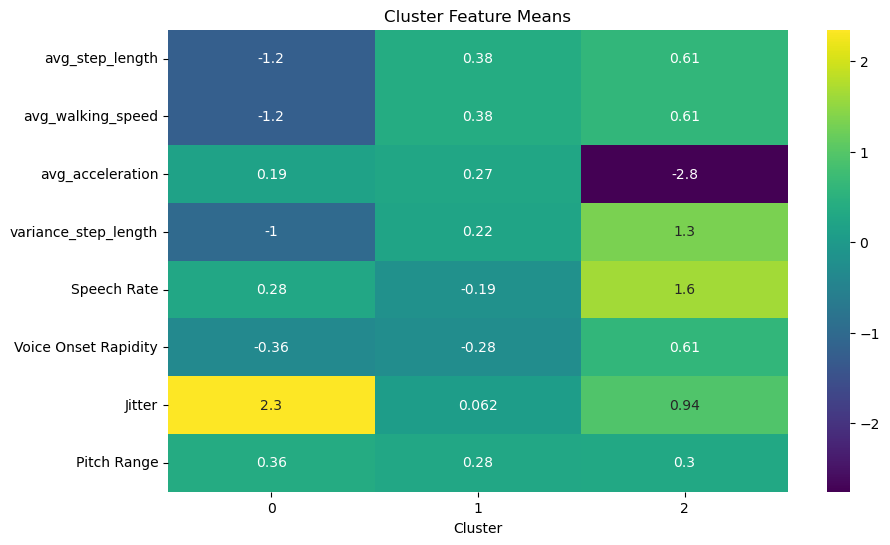

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of each feature for each cluster
cluster_means = combined_data.groupby('Cluster').mean()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis')
plt.title('Cluster Feature Means')
plt.savefig('heatmap.png')
plt.show()


The heatmap provided shows the mean values of each feature for each cluster. Here's a detailed interpretation of the cluster feature means:

### Cluster 0 (First Column)
- **`avg_step_length` and `avg_walking_speed`:** Both have mean values around -1.2, indicating that Cluster 0 is characterized by lower average step length and walking speed compared to the overall mean of the data.
- **`avg_acceleration`:** Slightly positive at 0.19, suggesting a moderate level of average acceleration.
- **`variance_step_length`:** Mean value is -1, indicating lower variance in step length.
- **`Speech Rate`:** Slightly positive at 0.28, suggesting a slightly higher speech rate.
- **`Voice Onset Rapidity`:** Negative at -0.36, indicating slower voice onset rapidity.
- **`Jitter`:** High positive value at 2.3, indicating high jitter in speech.
- **`Pitch Range`:** Positive at 0.36, indicating a higher pitch range.

### Cluster 1 (Second Column)
- **`avg_step_length` and `avg_walking_speed`:** Both have mean values around 0.38, indicating that Cluster 1 is characterized by slightly higher than average step length and walking speed.
- **`avg_acceleration`:** Slightly positive at 0.27, suggesting moderate average acceleration.
- **`variance_step_length`:** Mean value is 0.22, indicating a slight increase in variance of step length.
- **`Speech Rate`:** Slightly negative at -0.19, indicating a slightly lower speech rate.
- **`Voice Onset Rapidity`:** Negative at -0.28, indicating slower voice onset rapidity.
- **`Jitter`:** Close to zero at 0.062, indicating low jitter in speech.
- **`Pitch Range`:** Positive at 0.28, indicating a higher pitch range.

### Cluster 2 (Third Column)
- **`avg_step_length` and `avg_walking_speed`:** Both have mean values around 0.61, indicating that Cluster 2 is characterized by higher than average step length and walking speed.
- **`avg_acceleration`:** Strongly negative at -2.8, indicating significantly lower average acceleration.
- **`variance_step_length`:** Mean value is 1.3, indicating a high variance in step length.
- **`Speech Rate`:** Positive at 1.6, indicating a much higher speech rate.
- **`Voice Onset Rapidity`:** Positive at 0.61, indicating faster voice onset rapidity.
- **`Jitter`:** Positive at 0.94, indicating higher jitter in speech.
- **`Pitch Range`:** Positive at 0.3, indicating a higher pitch range.

### Summary and Insights
1. **Cluster 0**:
   - Characterized by lower walking speed and step length.
   - High speech jitter and pitch range.
   - Slightly higher speech rate but slower voice onset rapidity.
   
2. **Cluster 1**:
   - Slightly higher walking speed and step length than average.
   - Moderate levels in other features, with low jitter.
   - Speech rate and pitch range are slightly higher but close to average.

3. **Cluster 2**:
   - Highest walking speed and step length.
   - Very low average acceleration.
   - Highest speech rate and voice onset rapidity.
   - High jitter and pitch range.

From these insights, you can deduce that:
- **Higher step length and walking speed** are associated with **higher speech rate and faster voice onset rapidity** (Cluster 2).
- **Lower walking speed and step length** are associated with **high speech jitter and pitch range** (Cluster 0).
- **Moderate walking speed and step length** show balanced chanalysis or visualizations based on these findings?

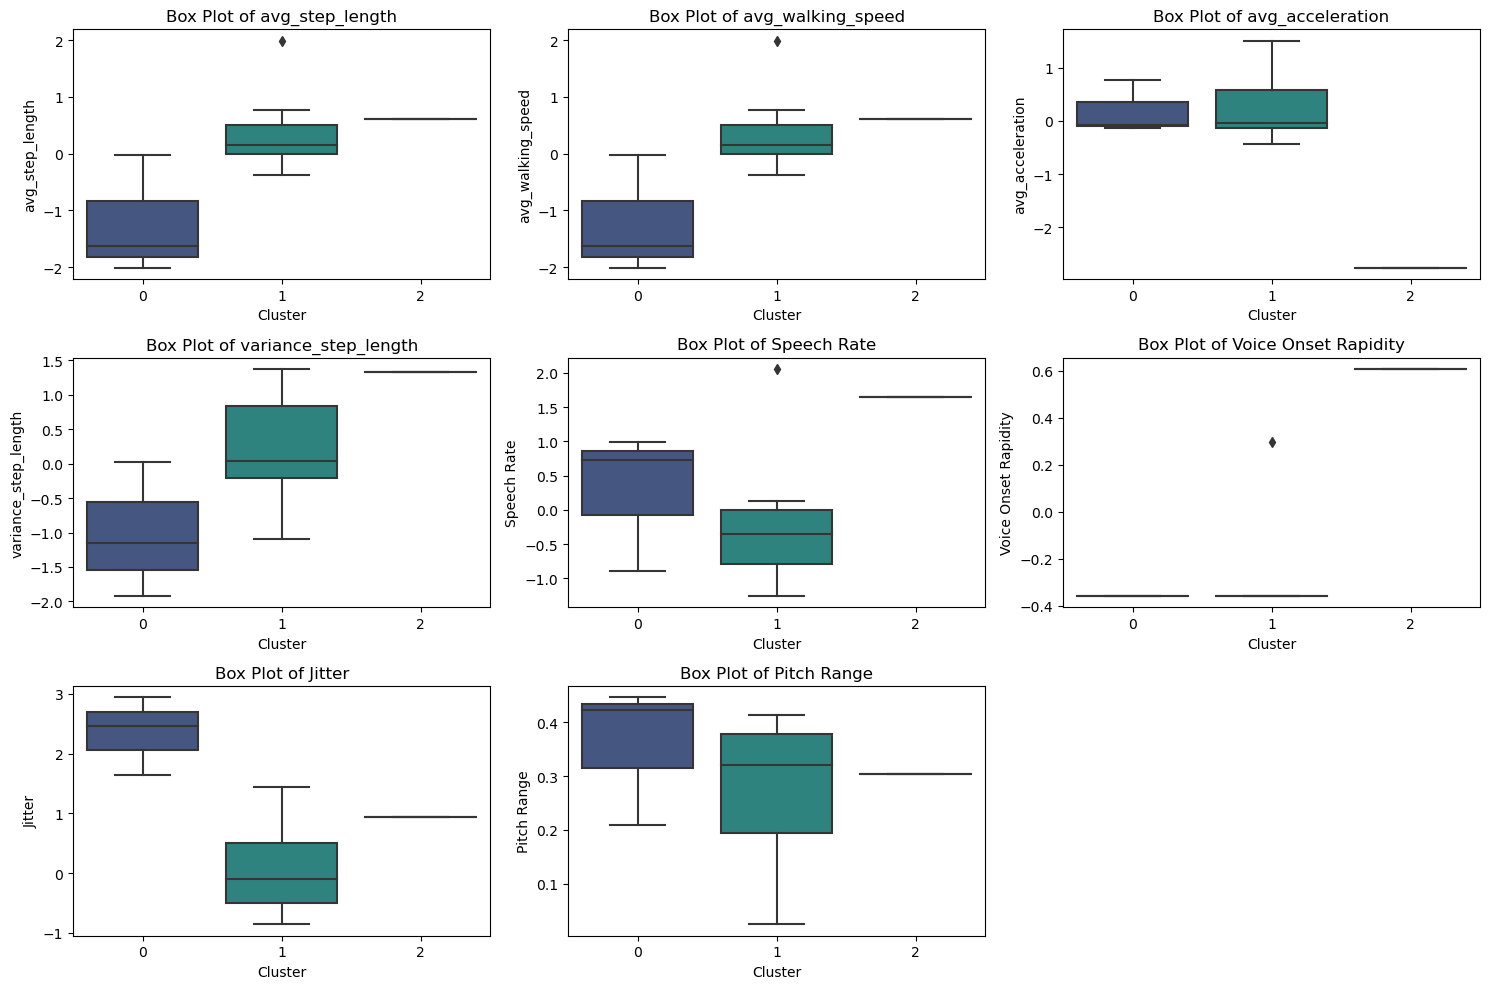

In [16]:
# Create box plots for each feature across clusters
features = combined_data.columns[:-1]  # Exclude the 'Cluster' column
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=combined_data, palette='viridis')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


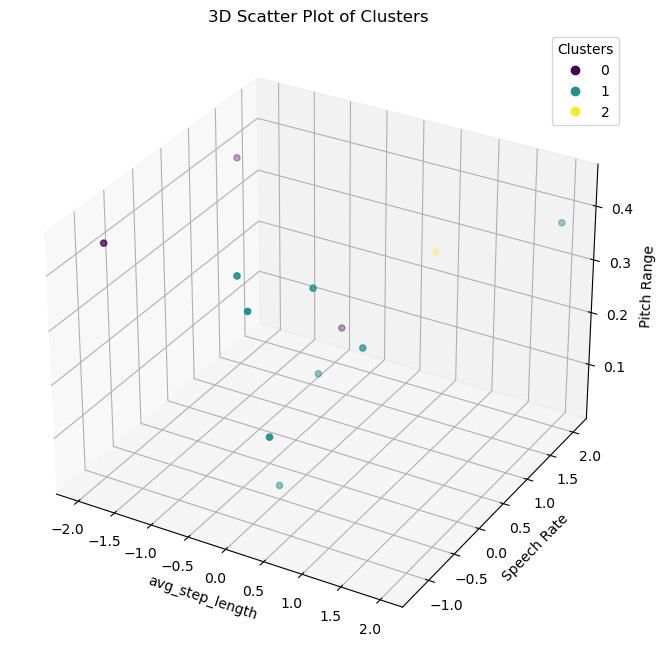

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Select three features to visualize
feature1 = 'avg_step_length'
feature2 = 'Speech Rate'
feature3 = 'Pitch Range'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(combined_data[feature1], combined_data[feature2], combined_data[feature3], c=combined_data['Cluster'], cmap='viridis')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
plt.title('3D Scatter Plot of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


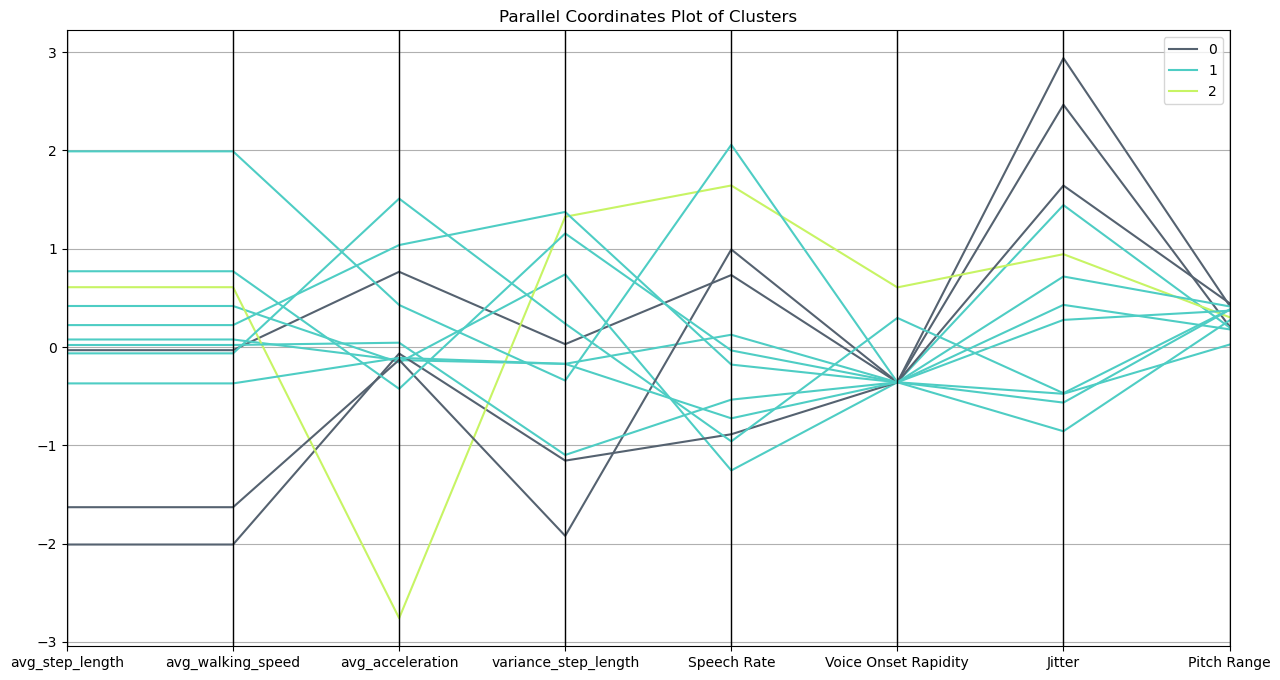

In [18]:
from pandas.plotting import parallel_coordinates

# Create a parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(combined_data, 'Cluster', color=['#556270', '#4ECDC4', '#C7F464'])
plt.title('Parallel Coordinates Plot of Clusters')
plt.show()
